
## Twitter Visualizations Project


In [70]:
from twython import Twython
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string

In [71]:
# Login using Twitter credentials
APP_KEY = 'xniDYFLSZ1kBv56l4cy84PjLC'
APP_SECRET = 'bAHyEKjs4SciA2WLBGbTnsPXqXgHaAamSK9juJuUG59peX3i9f'

twitter = Twython(APP_KEY, APP_SECRET, oauth_version=2)
ACCESS_TOKEN = twitter.obtain_access_token()
twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)

In [72]:
# Execute a search
# result_type can be 'popular', 'recent' or 'mixed'
# the max count is 100
#THE q CAN BE CHANGED ANYTIME DURING THE EXECUTION OF THE CODE TO SEARCH ABOUT A NEW HASHTAG
result = twitter.search(q= '#bookworm', result_type='mixed', count=100, lang='en')

In [73]:
# We get back a dictionary
result.keys()

dict_keys(['statuses', 'search_metadata'])

In [74]:
# the statuses component contains the tweets, lets count them
len(result['statuses'])

95

In [75]:
tweet = result['statuses'][0]

In [76]:
# pull out the text from the tweet
tweet['text']

'RT @KathleenHarrym1: #RT #BrokenDreams by @MarthaPerezBook\nDo you enjoy a story vivid and engaging characters and suspenseful plot, then th…'

In [77]:
# pull out the entities, the api found
# these are hashtags, urls, user mentions and other special parts of a tweet
tweet['entities']

{'hashtags': [{'text': 'RT', 'indices': [21, 24]},
  {'text': 'BrokenDreams', 'indices': [25, 38]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'KathleenHarrym1',
   'name': 'Kathleen Harryman',
   'id': 4083204135,
   'id_str': '4083204135',
   'indices': [3, 19]},
  {'screen_name': 'MarthaPerezBook',
   'name': 'Martha Perez',
   'id': 1034164935910219776,
   'id_str': '1034164935910219776',
   'indices': [42, 58]}],
 'urls': []}

In [78]:
# build a list of just the hashtags using a list comprehension
hashtags = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]

In [79]:
# a list to store the found hashtags, may have repeats
all_hashtags = []
# a list of lists, one for each tweet of the hashtags in that tweet
tweet_hashtags = []
# a dictionary mapping hashtags to an occurrence count
hashtag_counts = {}

# loop over twets
for tweet in result['statuses']:
    # a list comprhension to pull out a list of hashtags from the tweet
    hashtags = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    # add the hashtag list to our list of hashtag lists
    tweet_hashtags += [hashtags]
    # append the hashtags to our list of the hashtags
    all_hashtags += hashtags
    # increment the appropriate counts for all of the hashtags
    for tag in hashtags:
        if tag in hashtag_counts:
            hashtag_counts[tag] += 1
        else:
            hashtag_counts[tag] = 1

In [80]:
# list of all of the hashtags found
all_hashtags

['RT',
 'BrokenDreams',
 'amazon',
 'BookB',
 'Buzz',
 'nonfiction',
 'book',
 'ff',
 'writerwednesday',
 'fridayreads',
 'Greatreads',
 'bookreview',
 'author',
 'bookworm',
 'bookreview',
 'author',
 'bookworm',
 'bookreview',
 'author',
 'bookworm',
 'amwriting',
 'reading',
 'readingmoods',
 'byprojekt',
 'projekt',
 'reading',
 'readingmoods',
 'byprojekt',
 'Nightwing',
 'bookworms',
 'bookworm',
 'bookblogger',
 'blogposts',
 'giveaways',
 'rewards',
 'patreon',
 'bookreview',
 'author',
 'bookworm',
 'RRBC',
 'BookLover',
 'BookBlogger',
 'RT',
 'BrokenDreams',
 'Nightwing',
 'poem',
 'poetry',
 'poet',
 'audio',
 'art',
 'words',
 'wordsmith',
 'poetrypublisher',
 'artist',
 'writer',
 'BookWorm',
 'publisher',
 'tcot',
 'tlot',
 'ocra',
 'gop',
 'wwii',
 'duty',
 'war',
 'japan',
 'germany',
 'china',
 'USAF',
 'Military',
 'Army',
 'ttp',
 'tcot',
 'tlot',
 'ocra',
 'gop',
 'wwii',
 'duty',
 'war',
 'japan',
 'germany',
 'china',
 'USAF',
 'Military',
 'Army',
 'ttp',
 'tcot

## A word cloud of the all the hashtags used:

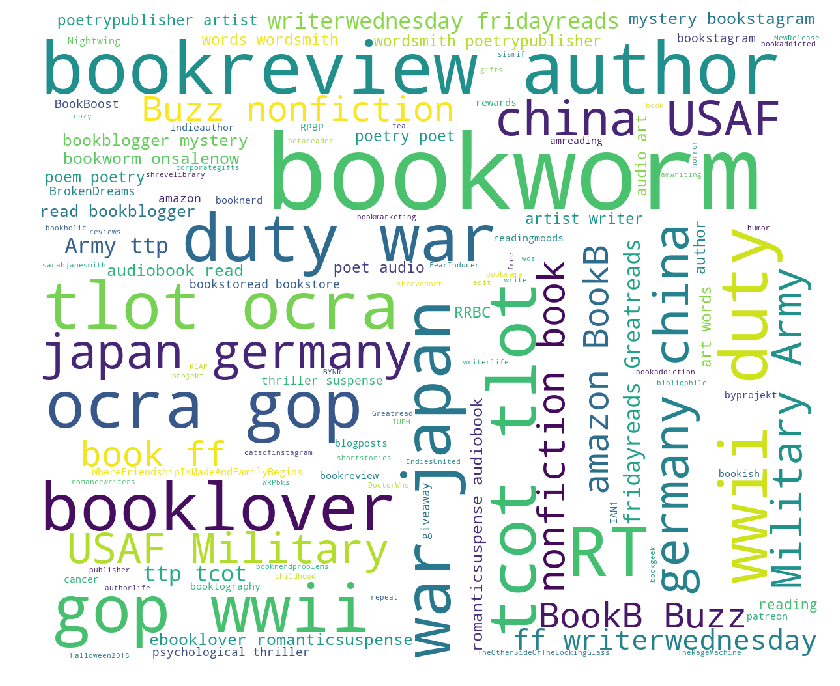

In [81]:
# Create a word cloud from the list of hash tags
plt.figure(figsize=(14,12))
cloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200, height=1000).generate(' '.join(list(all_hashtags)))
                                                                                                       
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [82]:
# dictionary of the occurrence counts of each hashtag
hashtag_counts

{'RT': 10,
 'BrokenDreams': 3,
 'amazon': 6,
 'BookB': 6,
 'Buzz': 6,
 'nonfiction': 7,
 'book': 9,
 'ff': 6,
 'writerwednesday': 6,
 'fridayreads': 6,
 'Greatreads': 6,
 'bookreview': 12,
 'author': 12,
 'bookworm': 23,
 'amwriting': 1,
 'reading': 4,
 'readingmoods': 2,
 'byprojekt': 2,
 'projekt': 1,
 'Nightwing': 2,
 'bookworms': 1,
 'bookblogger': 7,
 'blogposts': 2,
 'giveaways': 2,
 'rewards': 2,
 'patreon': 2,
 'RRBC': 5,
 'BookLover': 3,
 'BookBlogger': 3,
 'poem': 5,
 'poetry': 5,
 'poet': 5,
 'audio': 5,
 'art': 5,
 'words': 5,
 'wordsmith': 5,
 'poetrypublisher': 5,
 'artist': 5,
 'writer': 5,
 'BookWorm': 8,
 'publisher': 1,
 'tcot': 9,
 'tlot': 9,
 'ocra': 9,
 'gop': 9,
 'wwii': 9,
 'duty': 9,
 'war': 9,
 'japan': 9,
 'germany': 9,
 'china': 9,
 'USAF': 9,
 'Military': 9,
 'Army': 9,
 'ttp': 6,
 'booknerd': 2,
 'reviews': 1,
 'bookreviews': 1,
 'authorlife': 1,
 'writerlife': 1,
 'authors': 4,
 'free': 1,
 'Bookworm': 2,
 'giveaway': 1,
 'NewRelease': 1,
 'FearInducer': 1

In [83]:
# turn that dictionary into a pandas series
# now we could make a bar chart
hashtag_counts_series = pd.Series(hashtag_counts)

In [84]:
maxoccurence = hashtag_counts_series[hashtag_counts_series>4]

## A bar chart of the hashtags and their frequency of use:

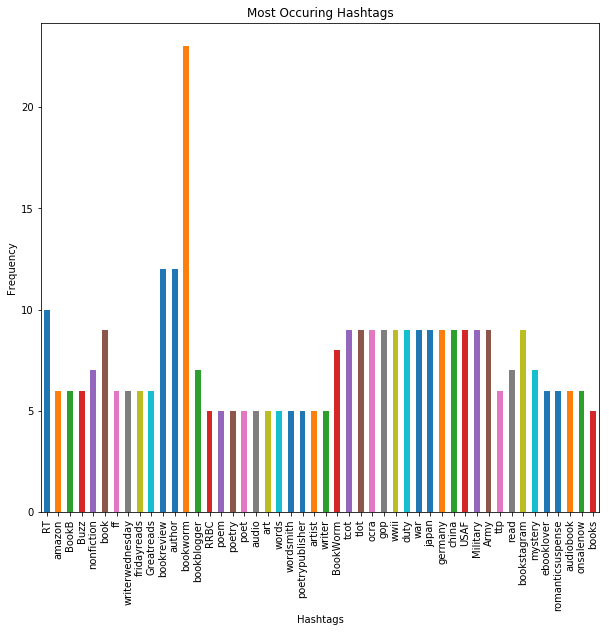

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,9))
maxoccurence.plot.bar()
ax.set_ylabel("Frequency")
ax.set_xlabel("Hashtags")
ax.set_title("Most Occuring Hashtags")
plt.show()


In [86]:
# list of lists containing the hashtags in each tweet
tweet_hashtags

[['RT', 'BrokenDreams'],
 ['amazon',
  'BookB',
  'Buzz',
  'nonfiction',
  'book',
  'ff',
  'writerwednesday',
  'fridayreads',
  'Greatreads'],
 ['bookreview', 'author', 'bookworm'],
 ['bookreview', 'author', 'bookworm'],
 ['bookreview', 'author', 'bookworm'],
 ['amwriting'],
 ['reading', 'readingmoods', 'byprojekt', 'projekt'],
 ['reading', 'readingmoods', 'byprojekt'],
 ['Nightwing'],
 ['bookworms', 'bookworm', 'bookblogger'],
 ['blogposts', 'giveaways', 'rewards', 'patreon'],
 ['bookreview', 'author', 'bookworm'],
 ['RRBC', 'BookLover', 'BookBlogger'],
 ['RT', 'BrokenDreams'],
 ['Nightwing'],
 ['poem',
  'poetry',
  'poet',
  'audio',
  'art',
  'words',
  'wordsmith',
  'poetrypublisher',
  'artist',
  'writer',
  'BookWorm',
  'publisher'],
 ['tcot',
  'tlot',
  'ocra',
  'gop',
  'wwii',
  'duty',
  'war',
  'japan',
  'germany',
  'china',
  'USAF',
  'Military',
  'Army',
  'ttp'],
 ['tcot',
  'tlot',
  'ocra',
  'gop',
  'wwii',
  'duty',
  'war',
  'japan',
  'germany',
  

In [87]:
# Next lets make a dataframe out of the list of lists
# that has the hashtags in each tweet
# we are going to use a preprocessor called a Transaction Encoder
# it will create a binary 2d array, rows are tweets and columns are a
# hashtags with 1's if that hashtag occurred in that tweet
te = TransactionEncoder()
occurrences = te.fit(tweet_hashtags).transform(tweet_hashtags).astype("uint8")
occurrences

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
# turn that 2d array into a dataframe with the column names
occurrences_df = pd.DataFrame(occurrences, columns=te.columns_)

In [89]:
# From that 2d array of hashtag occurrences lets create a co-occurrence matrix
# Rows and columns are a particular hashtag and the value is how many time
# those hashtags co-occurred (note that the diagonals simply contain the 
# number of times that hashtag occurred)
co_occurrences = occurrences.T.dot(occurrences)
co_occurrences

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 9],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 9, 0, ..., 0, 0, 9]], dtype=uint8)

In [90]:
# Turn that co-occurrence matrix into a dataframe with labels
co_occurrences_df = pd.DataFrame(co_occurrences, index=te.columns_, columns=te.columns_)

In [91]:
# The transaction encoder identified the distinct hashtags
te.columns_

['Amazon',
 'Army',
 'BYNR',
 'BookB',
 'BookBlogger',
 'BookBoost',
 'BookLover',
 'BookWorm',
 'Bookworm',
 'BrokenDreams',
 'Buzz',
 'DoctorWho',
 'FearInducer',
 'Greatreads',
 'Halloween2018',
 'IAN1',
 'IUPH',
 'IndiesUnited',
 'Military',
 'NewRelease',
 'Nightwing',
 'Poetry',
 'RCAP',
 'RPBP',
 'RRBC',
 'RT',
 'Read',
 'TheOtherSideOfTheLookingGlass',
 'TheRageMachine',
 'USAF',
 'WRPbks',
 'WhereFriendshipIsMadeAndFamilyBegins',
 'amazon',
 'amreading',
 'amwriting',
 'art',
 'artist',
 'audio',
 'audiobook',
 'author',
 'authorlife',
 'authors',
 'betareader',
 'bibliophile',
 'blogposts',
 'book',
 'bookaddicted',
 'bookaddiction',
 'bookblogger',
 'bookgeek',
 'bookholic',
 'bookish',
 'booklover',
 'booklovers',
 'bookmarketing',
 'bookmeme',
 'booknerd',
 'booknerdproblems',
 'bookreview',
 'bookreviews',
 'books',
 'bookstagram',
 'bookstore',
 'bookstoread',
 'booktography',
 'bookworm',
 'bookworms',
 'byprojekt',
 'cancer',
 'catsofinstagram',
 'childhood',
 'china',

In [92]:
# lets turn them into a list using list comprhension
# this is needed for the upcoming graph plot
labels = { k:te.columns_[k] for k in range(len(te.columns_)) }

## A graph of the hashtags with lines connecting hashtags that co-occur:

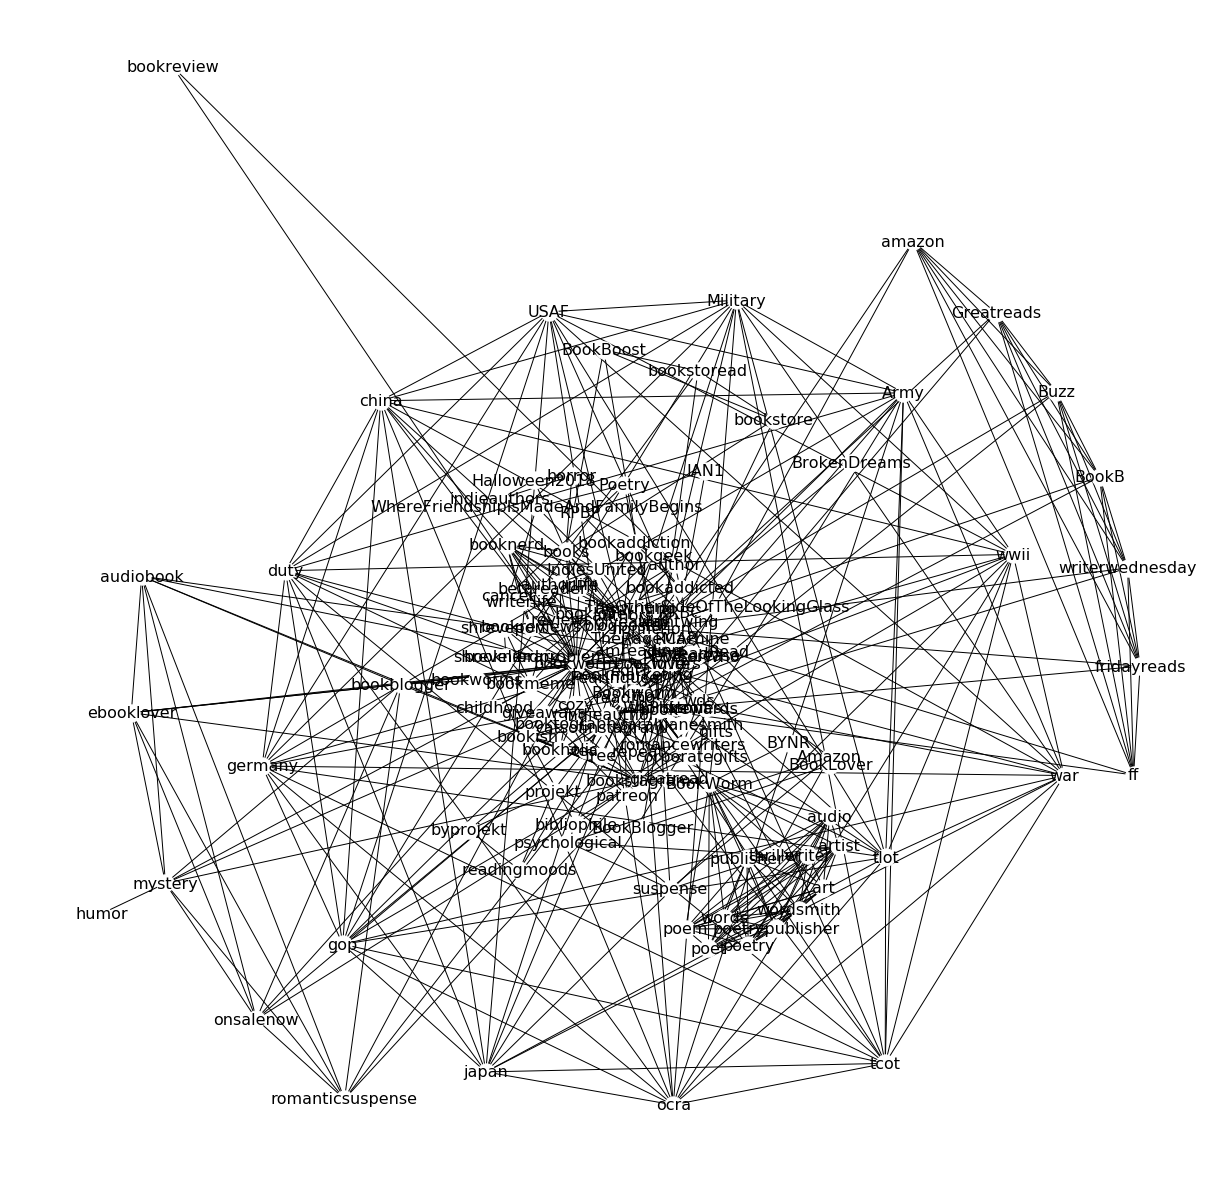

In [93]:
# Create a circular graph with hashtags
# lines connect hashtags that co-occur
plt.figure(figsize=(16,16))
# create graph using NetworkX package
g = nx.Graph(co_occurrences)
# draw the nodes in a circular layout and labeled using our label dictionary
nx.draw_kamada_kawai(g, labels=labels, with_labels=True, node_color='w', font_size=16)